# <span style='color:blue;'>Loading Data and Libraries</span>

## Load Libraries

In [69]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', None) # display all rows
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # make seaboorn override the styling of matplotlib graphs

from IPython.core.display import display

## Load Data

In [5]:
data = pd.read_csv('data/train.csv')

<hr>

# <span style='color:blue;'> Understanding The Dataset<span>

## Visualizing the head and tail 

In [6]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Checking the shape of the data frame

In [9]:
data.shape

(891, 12)

## Checking the data types of the columns
Note: Operations on a data frame typically result in a 1 dimension lower output   

In [11]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
ParCh            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### More info

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Gender         891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
ParCh          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# 5 summary statistic

On dtypes other than objects

In [19]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,ParCh,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


On object dtypes 

In [25]:
data.describe(include='object')

,Name,Gender,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mitkoff, Mr. Mito",male,347082,B96 B98,S
freq,1,577,7,4,644


## Exploring Column Value counts

In [95]:
for column_name in data:
    print(column_name)
    display(data[column_name].value_counts().sort_index(ascending=False))
    # print(data[column_name].value_counts().sort_values(ascending=False))
    print()

PassengerId


891    1
890    1
889    1
888    1
887    1
886    1
885    1
884    1
883    1
882    1
881    1
880    1
879    1
878    1
877    1
876    1
875    1
874    1
873    1
872    1
871    1
870    1
869    1
868    1
867    1
866    1
865    1
864    1
863    1
862    1
861    1
860    1
859    1
858    1
857    1
856    1
855    1
854    1
853    1
852    1
851    1
850    1
849    1
848    1
847    1
846    1
845    1
844    1
843    1
842    1
841    1
840    1
839    1
838    1
837    1
836    1
835    1
834    1
833    1
832    1
831    1
830    1
829    1
828    1
827    1
826    1
825    1
824    1
823    1
822    1
821    1
820    1
819    1
818    1
817    1
816    1
815    1
814    1
813    1
812    1
811    1
810    1
809    1
808    1
807    1
806    1
805    1
804    1
803    1
802    1
801    1
800    1
799    1
798    1
797    1
796    1
795    1
794    1
793    1
792    1
791    1
790    1
789    1
788    1
787    1
786    1
785    1
784    1
783    1
782    1
781    1
7


Survived


1    342
0    549
Name: Survived, dtype: int64


Pclass


3    491
2    184
1    216
Name: Pclass, dtype: int64


Name


van Melkebeke, Mr. Philemon                                                           1
van Billiard, Mr. Austin Blyler                                                       1
del Carlo, Mr. Sebastiano                                                             1
de Pelsmaeker, Mr. Alfons                                                             1
de Mulder, Mr. Theodore                                                               1
de Messemaeker, Mrs. Guillaume Joseph (Emma)                                          1
Zimmerman, Mr. Leo                                                                    1
Zabour, Miss. Thamine                                                                 1
Zabour, Miss. Hileni                                                                  1
Yrois, Miss. Henriette ("Mrs Harbeck")                                                1
Yousseff, Mr. Gerious                                                                 1
Yousif, Mr. Wazli               


Gender


male      577
female    314
Name: Gender, dtype: int64


Age


80.00     1
74.00     1
71.00     2
70.50     1
70.00     2
66.00     1
65.00     3
64.00     2
63.00     2
62.00     4
61.00     3
60.00     4
59.00     2
58.00     5
57.00     2
56.00     4
55.50     1
55.00     2
54.00     8
53.00     1
52.00     6
51.00     7
50.00    10
49.00     6
48.00     9
47.00     9
46.00     3
45.50     2
45.00    12
44.00     9
43.00     5
42.00    13
41.00     6
40.50     2
40.00    13
39.00    14
38.00    11
37.00     6
36.50     1
36.00    22
35.00    18
34.50     1
34.00    15
33.00    15
32.50     2
32.00    18
31.00    17
30.50     2
30.00    25
29.00    20
28.50     2
28.00    25
27.00    18
26.00    18
25.00    23
24.50     1
24.00    30
23.50     1
23.00    15
22.00    27
21.00    24
20.50     1
20.00    15
19.00    25
18.00    26
17.00    13
16.00    17
15.00     5
14.50     1
14.00     6
13.00     2
12.00     1
11.00     4
10.00     2
9.00      8
8.00      4
7.00      3
6.00      3
5.00      4
4.00     10
3.00      6
2.00     10
1.00      7
0.92


SibSp


8      7
5      5
4     18
3     16
2     28
1    209
0    608
Name: SibSp, dtype: int64


ParCh


6      1
5      5
4      4
3      5
2     80
1    118
0    678
Name: ParCh, dtype: int64


Ticket


WE/P 5735             2
W/C 14208             1
W.E.P. 5734           1
W./C. 6609            1
W./C. 6608            4
W./C. 6607            2
W./C. 14263           1
W./C. 14258           1
SW/PP 751             1
STON/O2. 3101290      1
STON/O2. 3101283      1
STON/O2. 3101282      1
STON/O2. 3101279      2
STON/O2. 3101271      1
STON/O 2. 3101294     1
STON/O 2. 3101293     1
STON/O 2. 3101292     1
STON/O 2. 3101289     1
STON/O 2. 3101288     1
STON/O 2. 3101286     1
STON/O 2. 3101285     1
STON/O 2. 3101280     1
STON/O 2. 3101275     1
STON/O 2. 3101274     1
STON/O 2. 3101273     1
STON/O 2. 3101269     1
SOTON/OQ 392090       1
SOTON/OQ 392089       1
SOTON/OQ 392086       1
SOTON/OQ 392082       1
SOTON/OQ 392076       1
SOTON/OQ 3101317      1
SOTON/OQ 3101316      1
SOTON/O2 3101287      1
SOTON/O2 3101272      1
SOTON/O.Q. 392087     1
SOTON/O.Q. 392078     1
SOTON/O.Q. 3101312    1
SOTON/O.Q. 3101311    1
SOTON/O.Q. 3101310    1
SOTON/O.Q. 3101307    1
SOTON/O.Q. 31013


Fare


512.3292     3
263.0000     4
262.3750     2
247.5208     2
227.5250     4
221.7792     1
211.5000     1
211.3375     3
164.8667     2
153.4625     3
151.5500     4
146.5208     2
135.6333     3
134.5000     2
133.6500     2
120.0000     4
113.2750     3
110.8833     4
108.9000     2
106.4250     2
93.5000      2
91.0792      2
90.0000      4
89.1042      2
86.5000      3
83.4750      2
83.1583      3
82.1708      2
81.8583      1
80.0000      2
79.6500      3
79.2000      4
78.8500      2
78.2667      2
77.9583      3
77.2875      2
76.7292      3
76.2917      1
75.2500      1
73.5000      5
71.2833      1
71.0000      2
69.5500      7
69.3000      2
66.6000      2
65.0000      2
63.3583      1
61.9792      1
61.3792      1
61.1750      1
59.4000      1
57.9792      2
57.0000      2
56.9292      2
56.4958      7
55.9000      2
55.4417      1
55.0000      2
53.1000      5
52.5542      3
52.0000      7
51.8625      2
51.4792      1
50.4958      1
50.0000      1
49.5042      2
49.5000   


Cabin


T                  1
G6                 4
F4                 2
F38                1
F33                3
F2                 3
F G73              2
F G63              1
F E69              1
E8                 2
E77                1
E68                1
E67                2
E63                1
E58                1
E50                1
E49                1
E46                1
E44                2
E40                1
E38                1
E36                1
E34                1
E33                2
E31                1
E25                2
E24                2
E17                1
E121               2
E12                1
E101               3
E10                1
D9                 1
D7                 1
D6                 1
D56                1
D50                1
D49                1
D48                1
D47                1
D46                1
D45                1
D37                1
D36                2
D35                2
D33                2
D30                1
D28          


Embarked


S    644
Q     77
C    168
Name: Embarked, dtype: int64

## Exploring Column Unique Values

In [43]:
for column_name in data:
    print(column_name)
    print(data[column_name].unique())
    print()

PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

## Checking how many null values each column has
Note: Operations on a data frame typically result in a 1 dimension lower output   

In [78]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
ParCh            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Filtering 

```isin()``` method helps in selecting rows with having a particular (or Multiple) value in a particular column. It return a boolean series (```in_specified_ports```) which can be passed to the data frame to see new filtered data frame.

In [94]:
ports_to_search = ['C', 'S']
in_specified_ports = data['Embarked'].isin(cabins_to_search)
data[in_specified_ports].head(6) # note that not all rows will be shown

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


### Negating the boolean series to see the other (opposite) data 
i.e. opposite ports than specified

Negate the boolean series with the tilda symbol ```~```

In [93]:
data[~in_specified_ports].head() # note the ~ negates the bool series 

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,ParCh,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q


<hr>

# <span style='color:blue;'>Visualizing The Data Using Density Distrubutions</span>


## Histograms
Distribution of values in columns

hist() arguments to consider passing in:
- bins: splits the data into groups based on the number specified 
- xrot: rotates the x index labels; <span style="color:red"> really useful for long x index labels </span>
- figsize(height, width): specify size of the figures

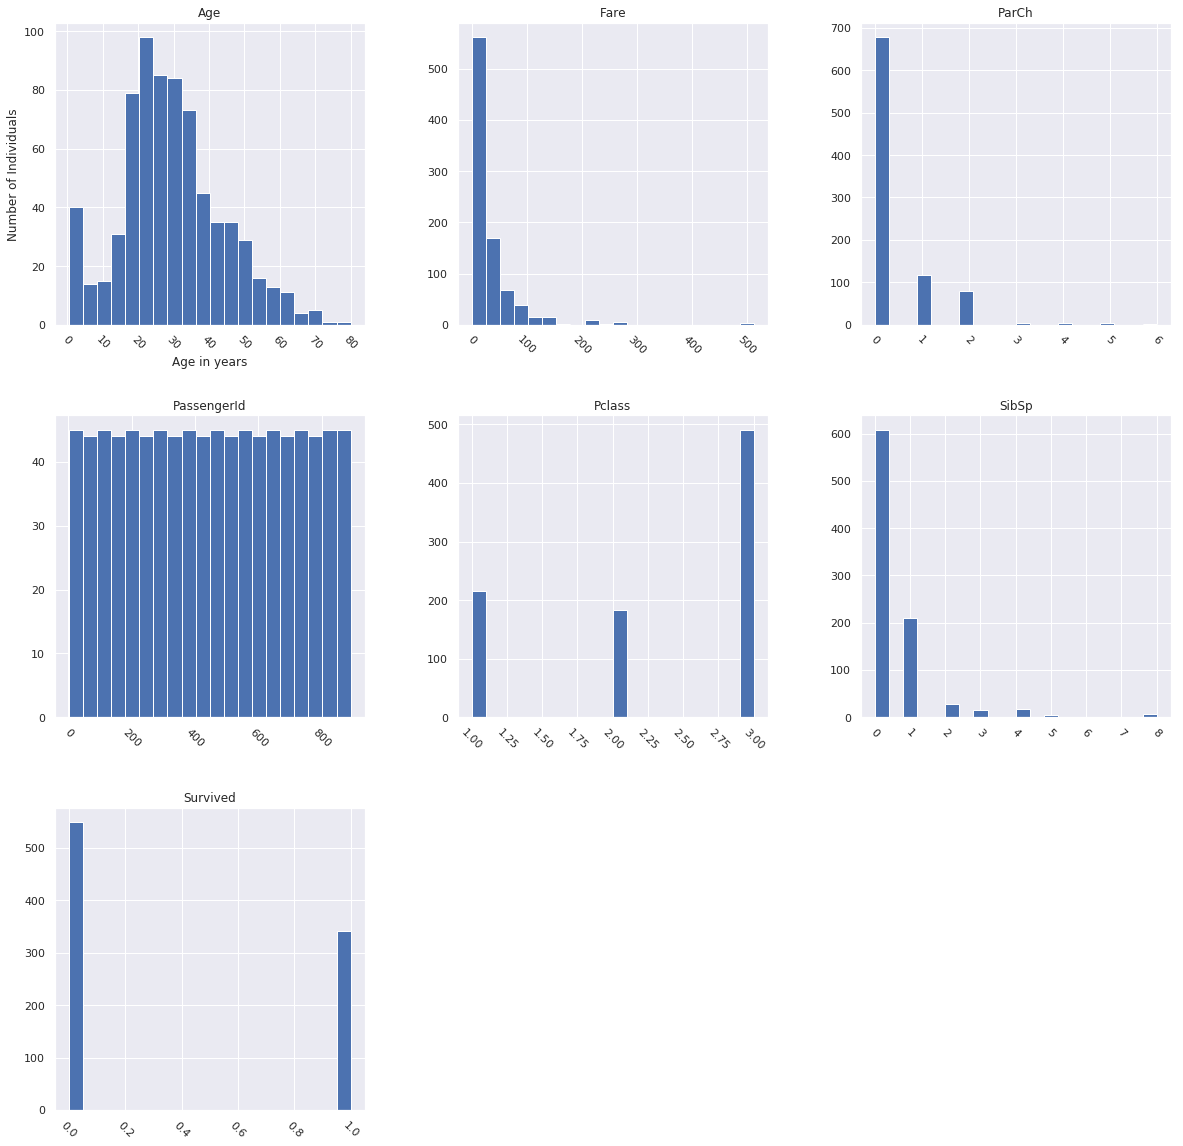

In [63]:
axesArray = data.hist(bins=20, xrot=-45, figsize=(20,20))
# print(axesArray) # returns axes as an multi-dimension array
axesArray = axesArray.flatten() # make axes easier to iterate over 

# Styling the plots axes'
axesArray[0].set_title('Age')
axesArray[0].set_xlabel("Age in years")
axesArray[0].set_ylabel("Number of Individuals")

plt.show()

# Density Distributions